In [1]:
# https://docs.opencv.org/3.4.0/d7/d4d/tutorial_py_thresholding.html
# pyimagesearch.com/2016/10/03/bubble-sheet-multiple-choice-scanner-and-test-grader-using-omr-python-and-opencv/

In [81]:
%matplotlib inline

from matplotlib import pyplot as plt
from imutils.perspective import four_point_transform
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2
from collections import OrderedDict
import string
import math
import requests

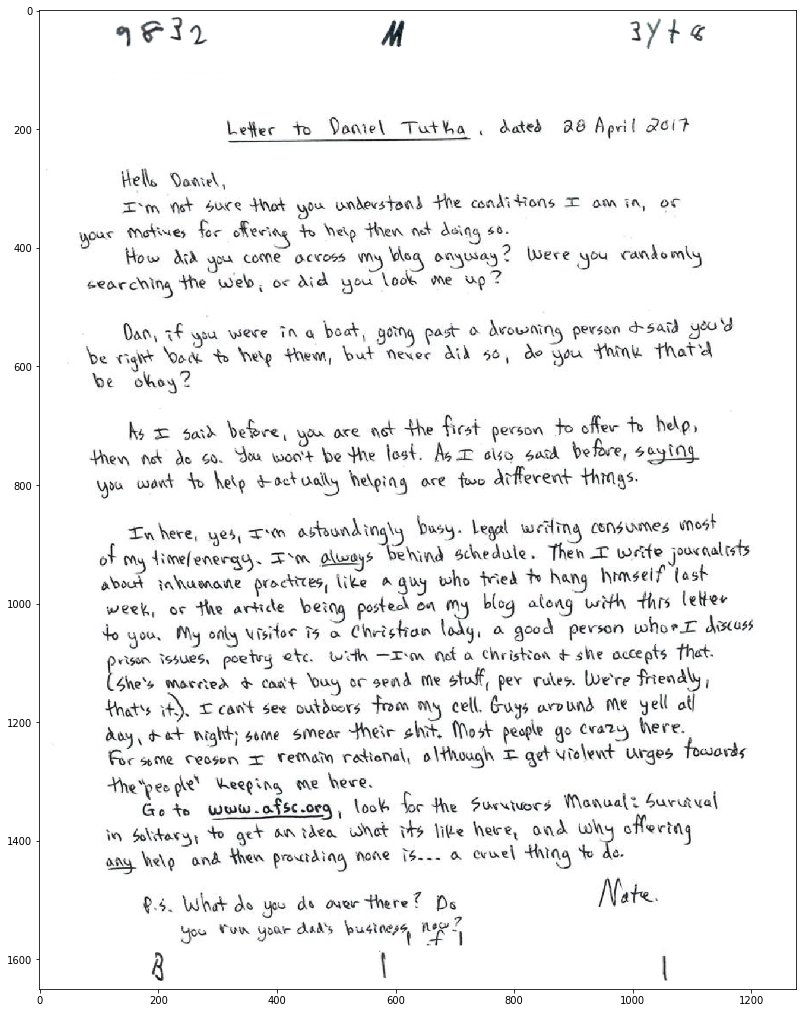

In [8]:
img_name = 'btb_mailing_c1.jpg'
img_loc = 'data/mailings/'

img = cv2.imread(img_loc + img_name)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (14,18))
plt.imshow(img)

#### SEPPERATE INTO UPPER AND LOWER ZONES

UPPER: 0 0   1275 100
LOWER: 0 1550   1275 1650


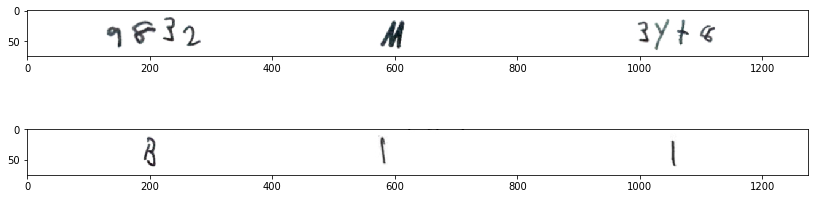

In [36]:
w = img.shape[1]
h = img.shape[0]

h_zone = 75

upper = img[0:h_zone, 0:w]
lower = img[h - h_zone:h, 0:w]

plt.figure(figsize = (14,4))

plt.subplot(2, 1, 1), plt.imshow(upper)
plt.subplot(2, 1, 2), plt.imshow(lower)

print 'UPPER:', 0, 0, ' ', w, zone
print 'LOWER:', 0, h - zone, ' ', w, h

#### SEPPERATE INTO BLOG INFO COMPONENTS

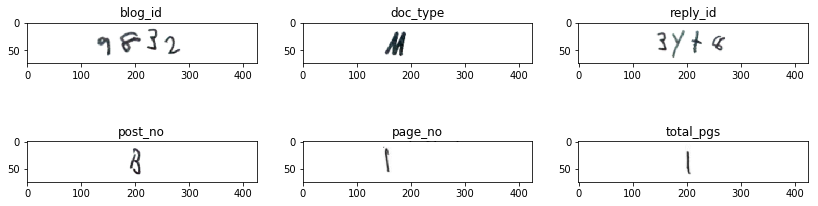

In [76]:
def get_document_rois(img, names, zone_height=75, x_zones=3, y_zones=2):
    
    doc_width = img.shape[1]
    doc_height = img.shape[0]

    upper = img[0: zone_height, 0: doc_width]
    lower = img[doc_height - zone_height: h, 0: doc_width]
    
    verticle_zones = [upper, lower]
    
#     return verticle_zones
    
    zone_imgs = []
    
    for vert_zone in verticle_zones:
        
        height = vert_zone.shape[0]
        width = int(w / float(x_zones))

        for i in range(x_zones):
            
            x1, y1 = width * i, 0
            x2, y2 = width * (i + 1), height
            
#             print height, width
#             print x1, y1, '  ', x2, y2
#             print '' 
            
            zone_img = vert_zone[y1:y2, x1:x2]
            zone_imgs.append(zone_img)
            
    zones = OrderedDict()
    
    # TODO: ADD ROI's TO DICT?
    for name, zone_img in zip(names, zone_imgs):
        
#         print name
        zones[name] = zone_img
            
    return zones
    

zone_names = ['blog_id', 'doc_type', 'reply_id', 'post_no', 'page_no', 'total_pgs']

document_zones = get_document_rois(img, zone_names)

rows = 2
cols = 3

plt.figure(figsize = (14,4))

for i, (name, zone) in enumerate(document_zones.items()):
    
    cv2.imwrite('data/mailings/zones/' + name + '.jpg', zone)
    plt.subplot(rows, cols, i + 1), plt.imshow(zone)
    plt.title(name)